In [23]:
import numpy as np
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import scipy
import sklearn
import math
from scipy import stats

In [24]:
def match_list(A,B):
    C= set(A).intersection(set(B))
    print(len(set(A)),len(set(B)),len(C))
    #return C

def create_match_list(A,B):
    C = set(A).intersection(set(B))
    #print(len(set(A)),len(set(B)),len(C))
    return list(C)

def icdf(dct):
	'''
		Simple function to compute an inverse cumulative density distribution from 
		a dictionary. 
	'''
	count = np.zeros(max(dct.values())+1)
    

	for k in dct:
		count[dct[k]] = count[dct[k]] + 1
	
	for i in reversed(range(len(count)-1)):
		count[i] = count[i] + count[i+1]
	
	count = count / count[0]

	return count

def compare_app_pat_date(d1,d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
   
    if d1> d2:
        return 1
    else: 
        return 0
    
def compare_app_date(d1,d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    
    if d1 > d2:
        return 1
    else: 
        return 0

def days_between_hN(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

def days_between_h(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def remove_duplicate(df, column):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = column, keep = False, inplace = True)
    return df

def remove_duplicates(df):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = None, keep = False, inplace = True)
    return df

def normalize_year19(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=2001+i
    return X, A

def no_normalize_year19(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        X[i]=2001+i
    return X, A

def normalize_team(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=1+i
    return X, A

def ratio_between_list(A,B):
    X=[0]*(len(A))
    for i in range(0,len(A)):
        X[i] = float(A[i])/B[i]
    return X
        

def Create_Array(Dict_1,Dict_2):
	'''
		Simple function to create arrays from two dictionaries with same project keys. 
	'''
	X = np.zeros(len(Dict_1))
	Y = np.zeros(len(Dict_2))
	i = 0
	for p in Dict_1.keys():
		X[i] = Dict_1[p]
		Y[i] = Dict_2[p] 
		i = i + 1   
	return X,Y 

# check the correlation
def check_correlation(D1, D2):
    size1 = len(D1)
    size2 = len(D2)
    new1 = dict()
    new2 = dict()
    if size1 < size2:
        for i in D1:
            if i in D2:
                new1[i] = D1[i]
                new2[i] = D2[i]
    else:
        for j in D2:
            if j in D1:
                new1[j] = D1[j]
                new2[j] = D2[j]
    X,Y = Create_Array(new1,new2)
    print("size: ", len(new1))
    print("Correlation: ",np.corrcoef(X, Y))
    return X, Y

def statistics(l):
    avg = sum(l)/len(l)
    m = max(l)
    n = min(l)
    return avg, m, n

# Parsed data

In [25]:
def combine_csv_to_df(path):
    all_files = glob.glob(os.path.join(path, "*.csv"))    
    df_from_each_file = (pd.read_csv(f, sep =';') for f in all_files)
    app_all_df   = pd.concat(df_from_each_file, ignore_index=True)
    return app_all_df

In [26]:
def create_combined_appframe(low,high):   
    frames=[]
    for i in range(low,high):
        numb = i
        app_path = "/kellogg/proj/smz6657/parsed_application_data/"+str(numb)+"/app_info/"
        temp_df = combine_csv_to_df(app_path)
        frames.append(temp_df)
    app_par_df = pd.concat(frames)
    return app_par_df

In [27]:
app_par_df = create_combined_appframe(2001,2020) # collecting from 2001-2019

In [28]:
app_par_df.head()

,abstract,app_date,app_id,assignee,assignee_addr,cpc,inventor_addr,inventors,ipc,parent_tree,provisional,pub_country,pub_date,pub_id,title
0,\nImproved methods for durable and regenerable...,20001130,9727819,NaN,NaN,NaN,Davis*CA*US,Gang *Sun,"\nD06M013/35\n,\nD06M013/352\n",US*08713406*19960913*GRANTED*5882357*09102525*...,NaN,NaN,20010405,20010000085,Formaldehyde scavenging in microbiocidal articles
1,\nThe task indicator decals imprinted with cod...,20001204,9729581,NaN,NaN,NaN,San Leandro*CA*US,Jeffrey *Lewis,\nG09F023/00\n,US*09366450*19990803*PENDING**09729581*CIP,US*60095224*19980804,NaN,20010405,20010000086,Task indicator decals for preventive maintenan...
2,\nA card display system of the present inventi...,20001206,9731416,NaN,NaN,NaN,"Plano*TX*US,Allen*TX*US,Addison*TX*US","Mark A.*Harwell,James D.*Hitt,Grant S.*Sandground",\nG09F003/18\n,US*09348104*19990706*PENDING**09731416*DIV,NaN,NaN,20010405,20010000087,Method of and system for displaying cards
3,\nThe subject of the present invention relates...,20001201,9728740,NaN,NaN,NaN,Istanbul**TR,Arif Dondar*Yetisener,\nE04B002/34\n,US*09355868*19990803*PENDING**09728740*DIV,NaN,NaN,20010405,20010000088,Prefabric fiber reinforced cement (GRC) wallpanel
4,"\nIn a vertical form, fill, seal machine that ...",20001201,9726357,NaN,NaN,NaN,Nazareth*PA*US,Barry L.*Pritchard,\nB65B009/00\n,US*09174426*19981019*GRANTED*6182426*09726357*DIV,NaN,NaN,20010405,20010000089,"Vertical form, fill, seal machine and methods"


In [29]:
app_par_df.shape

(5905310, 15)

In [30]:
app_par_df.drop(["provisional","pub_country","assignee","assignee_addr"], axis = 1, inplace = True)

In [31]:
app_par_df.shape

(5905310, 11)

In [32]:
#id-date dictionary
def create_app_filing_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000 and before 2019'''
    
    app_id_ls = list(df['app_id'].apply(str))
    app_date_ls = list(df['app_date'].apply(str))
    app_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = app_date_ls[i]
        
        if appid == "11343886": # corner case date is wrong
            date = "20060130"
        if date!= "nan":
            d = datetime.strptime(date, "%Y%m%d").year
            
            if d > 2000 and d < 2019:
                if appid not in app_date_dict:
                    app_date_dict[appid] = date
                    
                else: 
                    if date < app_date_dict[appid]:
                        #if d > 2018:
                        #print(date, " ", app_date_dict[appid])
                        app_date_dict[appid] = date 
                        count+=1
    print("repeatation: ",count)   
    return app_date_dict

In [33]:
app_filing_date_dict = create_app_filing_date_dict(app_par_df)

repeatation:  259


In [34]:
print("length of the date dictionary: ",len(app_filing_date_dict))

length of the date dictionary:  5737076


In [35]:
#id-date dictionary
def create_app_pub_id_dict(df):
    '''This makes dictionary form appid to pubid, ignoring repeatation of appid'''
    
    app_id_ls = list(df['app_id'].apply(str))
    pub_id_ls = list(df['pub_id'].apply(str))
    app_pub_dict = dict()
    count = 0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        pubid = pub_id_ls[i]
        
        if pubid!= "nan":
            app_pub_dict[appid] = pubid
        
    return app_pub_dict

In [36]:
app_pub_id_dict = create_app_pub_id_dict(app_par_df)

In [37]:
print("length of the id dictionary: ",len(app_pub_id_dict))

length of the id dictionary:  5894829


In [38]:
#id-date dictionary
def create_app_pub_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000'''
    
    app_id_ls = list(df['app_id'].apply(str))
    pub_date_ls = list(df['pub_date'].apply(str))
    pub_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = pub_date_ls[i]
        count+=1
        if appid == "11343886": # corner case date is wrong
            date = "20060130"
        if date!= "nan":
            d = datetime.strptime(date, "%Y%m%d").year
            
            if d > 2000:
                pub_date_dict[appid] = date
        
    return pub_date_dict

In [39]:
app_pub_date_dict = create_app_pub_date_dict(app_par_df)

In [40]:
print("length of the publication date dictionary: ",len(app_pub_date_dict))

length of the publication date dictionary:  5894829


In [41]:
def count_app_per_year(app_date):
    app_year = [0]*19
    for i in app_date:
        date = app_date[i]
        d = datetime.strptime(date, "%Y%m%d").year
        yr = d-2000
        yr = yr%20
        app_year[yr-1] = app_year[yr-1]+1
    return app_year
        
        
app_filing_date_count = count_app_per_year(app_filing_date_dict)
print(app_filing_date_count)
print(sum(app_filing_date_count))
app_pub_date_count = count_app_per_year(app_pub_date_dict)
print(app_pub_date_count)
print(sum(app_pub_date_count))

[218423, 245597, 292769, 300988, 307403, 323092, 327273, 316028, 295510, 307291, 331544, 353086, 372291, 378970, 378201, 374477, 354142, 259991, 0]
5737076
[56375, 198743, 236710, 267951, 289113, 294162, 299786, 320120, 327599, 332541, 320450, 330797, 345910, 378579, 380668, 379867, 373072, 375386, 387000]
5894829


## PEDS data

In [42]:
peds_app_path = "/kellogg/proj/smz6657/PEDS/parsed_PEDS/app_info/"
df_app_peds = combine_csv_to_df(peds_app_path)

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [43]:
df_app_peds.head()

,app_id,app_date,app_type,app_status,status_date,title,grant_num,grant_date
0,6106383,1980-01-01,Utility,Patented Case,1982-06-22,IONIC HYDROCARBON POLYMERS HAVING IMPROVED ADH...,4321337,1982-03-23
1,6108976,1980-01-02,Utility,Patented Case,1981-07-25,REINFOCED CONTAINER WITH INTEGRAL DIVIDER,4293091,1981-10-06
2,6108980,1980-01-02,Utility,Patented Case,1981-11-24,TYPEWRITER WITH THROAT FOR FRONT LOADING OF SH...,4302116,1981-11-24
3,6108977,1980-01-02,Utility,Patented Case,1981-06-23,EDUCATIONAL TOY,4286952,1981-09-01
4,6108975,1980-01-02,Utility,Patented Case,1982-06-22,COMPOSITE LOUNGE CHAIR STRUTURE,4335475,1982-06-22


In [44]:
df_app_peds.shape

(11860508, 8)

In [45]:
types = ["Utility"]
df_peds_util = df_app_peds[df_app_peds['app_type'].isin(types)]

In [46]:
#id-date dictionary
def create_peds_app_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000 and before 2019'''
    
    app_id_ls = list(df['app_id'].apply(str))
    app_date_ls = list(df['app_date'].apply(str))
    app_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        if appid[0]=="0":
            appid = appid[1:]
        date = app_date_ls[i]
        count+=1
        if date!= "nan" and date!="":
            d = datetime.strptime(date, "%Y-%m-%d").year
            if d > 2000 and d < 2019:
                app_date_dict[appid] = date
        
    return app_date_dict

In [47]:
peds_app_date_dict = create_peds_app_date_dict(df_peds_util)

In [48]:
def count_peds_app_per_year(app_date):
    '''PEDS has data till 2018'''
    app_year = [0]*18
    for i in app_date:
        date = app_date[i]
        d = datetime.strptime(date, "%Y-%m-%d").year
        yr = d-2000
        yr = yr%20
        app_year[yr-1] = app_year[yr-1]+1
    return app_year
        
        
peds_app_per_year = count_peds_app_per_year(peds_app_date_dict)
print(peds_app_per_year)
print(sum(peds_app_per_year))

[269016, 274673, 279074, 295645, 311770, 325874, 335466, 329340, 304124, 324013, 342095, 364594, 384775, 396844, 396460, 395643, 401830, 348335]
6079571


In [ ]:
# make a standard dictionary just with the mathched one.
# use this dictionary throught
# main_app_date


In [49]:
def create_main_app_date_dict(d1,d2):
    app_year = [0]*18
    main_dict = dict()
    for i in d1:
        if i in d2:
            date = d1[i]
            #date2 = d2[i]
            d = datetime.strptime(date, "%Y%m%d").year
            yr = d-2000
            yr = yr%20
            app_year[yr-1] = app_year[yr-1]+1
            main_dict[i] = date
    print(app_year)
    print(sum(app_year))
    return main_dict

In [50]:
main_app_date_dict = create_main_app_date_dict(app_filing_date_dict,peds_app_date_dict)

[217658, 245206, 292457, 300517, 307024, 322626, 326997, 315944, 295490, 307276, 331529, 353065, 372275, 378938, 378169, 370892, 326352, 253201]
5695616


# Selecting A61

In [51]:
df_app_cpc = app_par_df[["app_id","cpc","ipc"]]

In [52]:
df_app_cpc.head()

,app_id,cpc,ipc
0,9727819,NaN,"\nD06M013/35\n,\nD06M013/352\n"
1,9729581,NaN,\nG09F023/00\n
2,9731416,NaN,\nG09F003/18\n
3,9728740,NaN,\nE04B002/34\n
4,9726357,NaN,\nB65B009/00\n


In [53]:
def create_cpc_ipc_dict(df):
    app_id_ls = list(df['app_id'].apply(str))
    cpc_ls = list(df['cpc'].apply(str))
    ipc_ls = list(df['ipc'].apply(str))
    
    app_cpc_dict = dict()
    app_ipc_dict = dict()
    
    for i in range(0, len(app_id_ls)):
    #for i in range(0, 1000):
        pid = app_id_ls[i]
        cpc = cpc_ls[i]
        ipc = ipc_ls[i]
        app_cpc_dict[pid] = cpc
        app_ipc_dict[pid] = ipc
        
        
    return app_cpc_dict, app_ipc_dict
    

In [54]:
app_cpc_dict, app_ipc_dict = create_cpc_ipc_dict(df_app_cpc)

In [55]:
def create_app_SUB_dict(main_app_date_dict, cpc_dict, ipc_dict):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    
    app_id_ls = list(cpc_dict.keys())
    
    sub_pat_dict = dict()
   
    pat_sub_dict = dict()
    #pat_sec_dict = dict()
    #pat_gr_dict = dict ()
    
    print(len(app_id_ls))
    #print(len(set(app_id_ls)))
    count = 0
    print("main dictionary: ",len(main_app_date_dict))
    for i in range(0, len(app_id_ls)):
    #for i in range(0, 1000):
        pid = app_id_ls[i]
        cpc = cpc_dict[pid]
        ipc = ipc_dict[pid]
        if pid in main_app_date_dict: 
        
            if cpc!="" and cpc!="nan":
                
                lscpc = cpc.split(",")
                #print("list-cpc:", lscpc)
                #pids = []
                subs = []
                for el in lscpc:
                    
                    secs = el.split("-")
                    sec = secs[0]
                    sub = sec+ secs[1]
                    gr =  sub + secs[2]
                   
                    
                    if sub not in sub_pat_dict and sub not in subs:
                        sub_pat_dict[sub] = [pid]
                        subs.append(sub)
                        #pids.append(pid)
                    elif sub not in subs:
                        #if pid not in sub_pat_dict[sub]:
                        sub_pat_dict[sub].append(pid)
                        subs.append(sub)
                        #if pid not in pids:
                            #pids.append(pid)
                            #print(pids)


                   

                    if pid not in pat_sub_dict:
                        
                        pat_sub_dict[pid] = [sub]
                    else:
                        if sub not in pat_sub_dict[pid]:
                            pat_sub_dict[pid].append(sub)

                #sub_pat_dict[sub] = list(set(pids))   
                
            
            elif ipc!="" and ipc!="nan":
                #print("IPC", ipc)
                ipc = ipc.replace('\n','')
                #print("IPC", ipc)
                lscpc = ipc.split(",")
                #print("list-ipc:", lscpc)
                
                subs=[]
                for el in lscpc:
                    
                    if "-" in el:
                        secs = el.split("-")
                        sec = secs[0]
                        sub = sec+ secs[1]
                        gr =  sub + secs[2]
                        
                    else:
                        #if 'C 0' in el:
                            #print(el)
                        new_el = el.replace(" ", "")
                        sec = new_el[0]
                        sub = sec +new_el[1]+new_el[2]
                        gr =  sub +new_el[3]
                        
                    #print(sec)
                    #print(sub)
                    #print(gr)
                    #print("----")
                    
                    

                    if sub not in sub_pat_dict and sub not in subs:
                        sub_pat_dict[sub] = [pid]
                        subs.append(sub)
                        #pids.append(pid)
                    elif sub not in subs:
                        #if pid not in sub_pat_dict[sub]:
                        sub_pat_dict[sub].append(pid)
                        subs.append(sub)
                        #if pid not in pids:
                            #pids.append(pid)
                            #print(pids)

                   

                    if pid not in pat_sub_dict:
                        pat_sub_dict[pid] = [sub]
                    else:
                        if sub not in pat_sub_dict[pid]:
                            pat_sub_dict[pid].append(sub)

            else:
                #print("PROBLEM")
                count = count+1
                continue
    print("Problem: ", count)
    return sub_pat_dict, pat_sub_dict

In [56]:
SUB_app_dict, app_SUB_dict = create_app_SUB_dict(main_app_date_dict,app_cpc_dict, app_ipc_dict)

5894829
main dictionary:  5695616
Problem:  121


In [57]:
#all keys - some are not relevant
print(SUB_app_dict.keys())
print(len(SUB_app_dict))

dict_keys(['A41', 'A42', 'E04', 'A47', 'A45', 'D06', 'B25', 'E05', 'E06', 'B65', 'F16', 'A44', 'D02', 'B21', 'B32', 'B23', 'H01', 'H05', 'G01', 'B26', 'B27', 'F26', 'B05', 'A43', 'E01', 'G09', 'A01', 'C10', 'B60', 'B42', 'B01', 'F02', 'F01', 'F15', 'F25', 'F28', 'D04', 'G05', 'B62', 'C22', 'C21', 'G10', 'B64', 'F41', 'B41', 'C09', 'F23', 'D05', 'B63', 'C30', 'C23', 'B28', 'E21', 'A61', 'A62', 'B29', 'B08', 'H02', 'E03', 'B67', 'C06', 'B31', 'B44', 'D21', 'B22', 'F24', 'B61', 'B66', 'C01', 'C02', 'C25', 'A63', 'B07', 'G03', 'F27', 'A21', 'G06', 'B02', 'G11', 'F42', 'G21', 'C04', 'G02', 'H04', 'A46', 'H03', 'G08', 'F21', 'G04', 'E02', 'F04', 'C12', 'C11', 'C08', 'A23', 'C07', 'D03', 'B24', 'B04', 'G07', 'C13', 'F17', 'F03', 'F22', 'A24', 'B03', 'D01', 'B43', 'A22', 'C03', 'B68', 'B30', 'C05', 'B09', 'G12', 'D07', 'B06', 'C14', 'B81', 'B82', 'C40', 'C99', 'H99', 'E99', 'G99', 'Y10', 'B99', 'Y02', 'F99', 'D99', 'G16', 'D10', 'F05', 'Y04', 'B33'])
135


In [58]:
x = list(SUB_app_dict.keys())
x.sort()
print(x)

['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A61', 'A62', 'A63', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'B33', 'B41', 'B42', 'B43', 'B44', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B81', 'B82', 'B99', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C21', 'C22', 'C23', 'C25', 'C30', 'C40', 'C99', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D10', 'D21', 'D99', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E21', 'E99', 'F01', 'F02', 'F03', 'F04', 'F05', 'F15', 'F16', 'F17', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'F99', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G16', 'G21', 'G99', 'H01', 'H02', 'H03', 'H04', 'H05', 'H99', 'Y02', 'Y04', 'Y10']


In [43]:
print(len(SUB_app_dict["B99"]))

1


In [171]:
print(len(SUB_app_dict["Y10"]))
print(len(SUB_app_dict["Y02"]))
print(len(SUB_app_dict["Y04"]))

15599
7016
357


In [59]:
def clean_SUB_dict(dt):
    final_SUB_app_dict = dict()
    for el in dt:
        if "99" in el:
            continue
        elif "Y" in el:
            continue
        else:
            final_SUB_app_dict[el] = dt[el]
    return final_SUB_app_dict
final_SUB_app_dict = clean_SUB_dict(SUB_app_dict)

In [60]:
print(final_SUB_app_dict.keys())

dict_keys(['A41', 'A42', 'E04', 'A47', 'A45', 'D06', 'B25', 'E05', 'E06', 'B65', 'F16', 'A44', 'D02', 'B21', 'B32', 'B23', 'H01', 'H05', 'G01', 'B26', 'B27', 'F26', 'B05', 'A43', 'E01', 'G09', 'A01', 'C10', 'B60', 'B42', 'B01', 'F02', 'F01', 'F15', 'F25', 'F28', 'D04', 'G05', 'B62', 'C22', 'C21', 'G10', 'B64', 'F41', 'B41', 'C09', 'F23', 'D05', 'B63', 'C30', 'C23', 'B28', 'E21', 'A61', 'A62', 'B29', 'B08', 'H02', 'E03', 'B67', 'C06', 'B31', 'B44', 'D21', 'B22', 'F24', 'B61', 'B66', 'C01', 'C02', 'C25', 'A63', 'B07', 'G03', 'F27', 'A21', 'G06', 'B02', 'G11', 'F42', 'G21', 'C04', 'G02', 'H04', 'A46', 'H03', 'G08', 'F21', 'G04', 'E02', 'F04', 'C12', 'C11', 'C08', 'A23', 'C07', 'D03', 'B24', 'B04', 'G07', 'C13', 'F17', 'F03', 'F22', 'A24', 'B03', 'D01', 'B43', 'A22', 'C03', 'B68', 'B30', 'C05', 'B09', 'G12', 'D07', 'B06', 'C14', 'B81', 'B82', 'C40', 'G16', 'D10', 'F05', 'B33'])


In [52]:
# creating the list with A61 applications

def create_specific_SUB_list(field,dt):
    app_list =[]
    for e in dt:
        if e == field:
            print(len(dt[e]))
            app_list = dt[e]
    print(field)
    print(len(app_list))
    print(len(set(app_list)))
    print("----------------------")
    return app_list
    #print("publication ids---")
    #for i in range(100000,100010):
        #print(app_pub_id_dict[A61_app_list[i]])

In [61]:
ls_IMP_subs = ["A61", "A01", "B01", "C07", "D06","E04","F16","G06","H04"]

dt_IMP_names = {"A61":["Medical","Medical"],
                "A01":["Agriculture","Agriculture"],
                "B01": ["Apparatus","PHYSICAL OR CHEMICAL PROCESSES OR APPARATUS INGENERAL"], 
                "C07":["Org. chem.","ORGANIC CHEMISTRY"],
                "D06":["Treat textile","TREATMENT OF TEXTILES OR THE LIKE; LAUNDERING; FLEXIBLEMATERIALS NOT OTHERWISE PROVIDED FOR"],
                "E04":["Building","BUILDING"],
                "F16":["Mech. unit","ENGINEERING ELEMENTS AND UNITS; GENERAL MEASURESFOR PRODUCING AND MAINTAINING EFFECTIVE FUNCTIONINGOF MACHINES OR INSTALLATIONS; THERMAL INSULATION INGENERAL"],
                "G06":["Computing","COMPUTING; CALCULATING; COUNTING"],
                "H04":["El. comm. tech.","ELECTRIC COMMUNICATION TECHNIQUE"]}


In [62]:
def print_stat(ls, dt, sub_dt):
    for x in ls:
        print("subsection: ", x, " desc: ",dt[x][0], " long desc: ",dt[x][1]," Length: ", len(sub_dt[x]) )
print_stat(ls_IMP_subs, dt_IMP_names , final_SUB_app_dict)

subsection:  A61  desc:  Medical  long desc:  Medical  Length:  682295
subsection:  A01  desc:  Agriculture  long desc:  Agriculture  Length:  89122
subsection:  B01  desc:  Apparatus  long desc:  PHYSICAL OR CHEMICAL PROCESSES OR APPARATUS INGENERAL  Length:  106323
subsection:  C07  desc:  Org. chem.  long desc:  ORGANIC CHEMISTRY  Length:  244334
subsection:  D06  desc:  Treat textile  long desc:  TREATMENT OF TEXTILES OR THE LIKE; LAUNDERING; FLEXIBLEMATERIALS NOT OTHERWISE PROVIDED FOR  Length:  12654
subsection:  E04  desc:  Building  long desc:  BUILDING  Length:  39907
subsection:  F16  desc:  Mech. unit  long desc:  ENGINEERING ELEMENTS AND UNITS; GENERAL MEASURESFOR PRODUCING AND MAINTAINING EFFECTIVE FUNCTIONINGOF MACHINES OR INSTALLATIONS; THERMAL INSULATION INGENERAL  Length:  152635
subsection:  G06  desc:  Computing  long desc:  COMPUTING; CALCULATING; COUNTING  Length:  974875
subsection:  H04  desc:  El. comm. tech.  long desc:  ELECTRIC COMMUNICATION TECHNIQUE  Length

In [63]:
# gives a list of dictionaries 
def create_SUB_dict_year(dt, main_app_date_dict):
    '''This returns a list of dictionaries for every year containing yearwise applications'''
    grand_ls = [0]*18
    
    # list of dictionaries
    for yr in range(0,18):
        d1 = dict()
        grand_ls[yr] = d1
    
    # separate by years
    for sub in dt:
        for app in dt[sub]:
            d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
            d = d-2000
            yr = d%20 # we have till 2018
            
            
            if sub not in grand_ls[yr-1]:
                    grand_ls[yr-1][sub] = [app]
            else:
                    grand_ls[yr-1][sub].append(app)
       
    return grand_ls
list_SUB_dict_yr = create_SUB_dict_year(final_SUB_app_dict, main_app_date_dict)
#ls_IMP_subs,dt_IMP_names , final_SUB_app_dict, list_SUB_dict_yr

In [64]:
#list_imp_sub_dict_yr
def create_IMP_SUB_dict_year(list_SUB_dict_yr):
    '''This returns a list of dictionaries for every year containing yearwise applications'''
    grand_ls = [0]*18
    
    # list of dictionaries
    for yr in range(0,18):
        d1 = dict()
        grand_ls[yr] = d1
    
    # separate by years
    for i in range(0,18):
        for sub in list_SUB_dict_yr[i]:
            if sub in ls_IMP_subs:
                grand_ls[i][sub] = list_SUB_dict_yr[i][sub]
       
    return grand_ls
list_IMP_SUB_dict_yr = create_IMP_SUB_dict_year(list_SUB_dict_yr)
#ls_IMP_subs,dt_IMP_names , final_SUB_app_dict, list_SUB_dict_yr

In [157]:
#test the keys in each dictionary
count = 0
for el in list_IMP_SUB_dict_yr:
    for i in el:
        if i =="A61":
            print(len(el[i]))
            #count+=len(el[i])
            #print(count)

22294
28608
37089
36799
36020
39192
39382
36313
36297
37181
35772
36911
40160
43747
46943
50026
43757
35804


In [116]:
#test the keys in each dictionary
#ls_IMP_subs,dt_IMP_names , final_SUB_app_dict, list_SUB_dict_yr
def percentages_per_year(list_dict, ls_IMP_subs):
    # prepare a dict
    IMP_perc_dt = dict()
    for x in ls_IMP_subs:
        IMP_perc_dt[x] = [0]*18
        
    count_yr = 0
    for el in list_dict:
        all_val = list(el.values())
        ss=0
        for p in all_val:
            ss = ss+ len(p)
        #print("")
        print("AVG: ", ss/len(all_val))
        
        for imp in ls_IMP_subs:
            for x in el:
                if x == imp:
                    a61 = len(el[x])
                    #print(len(el[x]))
            #print("total: ", ss)
            #print("the number for: ",imp," is:", a61)
            print("percentage: ",(a61*100)/ss)
            IMP_perc_dt[imp][count_yr] = (a61*100)/ss
        count_yr+=1
        print("------------------------------------------------------")
    return IMP_perc_dt
IMP_perc_dt= percentages_per_year(list_SUB_dict_yr, ls_IMP_subs)

AVG:  2114.5583333333334
percentage:  8.785916680788345
percentage:  1.3998195052552345
percentage:  1.3328236392942576
percentage:  4.136797676425731
percentage:  0.1536963983810646
percentage:  0.6435544065545602
percentage:  2.052438058380986
percentage:  13.051188782527477
percentage:  8.480888444001309
------------------------------------------------------
AVG:  2378.9166666666665
percentage:  10.02136826987074
percentage:  1.3794794549339686
percentage:  1.4488387571373524
percentage:  5.005429642344204
percentage:  0.17795214908746979
percentage:  0.6123235366238133
percentage:  1.9718359197113533
percentage:  11.242862647563667
percentage:  7.995586226223421
------------------------------------------------------
AVG:  2763.6528925619837
percentage:  11.091141799391153
percentage:  1.3905419225961568
percentage:  1.49909390494076
percentage:  4.6841825108701505
percentage:  0.18121901184801525
percentage:  0.6384531192995258
percentage:  2.0741502742208477
percentage:  11.042697

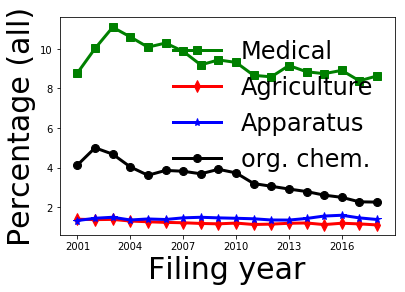

In [120]:
def plot_app_inv_per_filing_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('Percentage (all)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(IMP_perc_dt["A61"], num)
X, Y2 = no_normalize_year19(IMP_perc_dt["A01"], num)
X, Y3 = no_normalize_year19(IMP_perc_dt["B01"], num)
X, Y4 = no_normalize_year19(IMP_perc_dt["C07"], num)

plot_app_inv_per_filing_year(X,Y1,dt_IMP_names["A61"][0],Y2,dt_IMP_names["A01"][0], Y3, dt_IMP_names["B01"][0], Y4,dt_IMP_names["C07"][0])

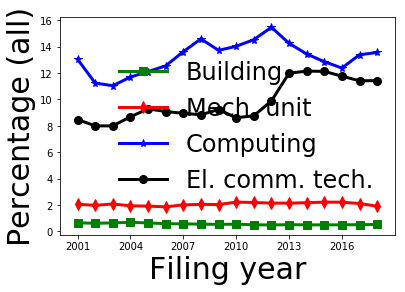

In [121]:
def plot_app_inv_per_filing_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('Percentage (all)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(IMP_perc_dt["E04"], num)
X, Y2 = no_normalize_year19(IMP_perc_dt["F16"], num)
X, Y3 = no_normalize_year19(IMP_perc_dt["G06"], num)
X, Y4 = no_normalize_year19(IMP_perc_dt["H04"], num)

plot_app_inv_per_filing_year(X,Y1,dt_IMP_names["E04"][0],Y2,dt_IMP_names["F16"][0], Y3, dt_IMP_names["G06"][0], Y4,dt_IMP_names["H04"][0])

In [128]:
# average among all the sections of A
def percentages_per_year(list_dict, ls_IMP_subs):
    
    IMP_perc_dt = dict()
    for x in ls_IMP_subs:
        IMP_perc_dt[x] = []
    
    for imp in ls_IMP_subs:
        
        for el in list_dict:

            ss=0
            a61 =0

            for x in el:
                sec = imp[0]
                
                if sec in x:
                    ss+=len(el[x])
                    
                if x == imp:
                    a61 = len(el[x])
                    print("The length of the subsetion: ",imp, "is:", len(el[x]))
                    
                    
            #print("avg: ",ss/15)
            #print("total: ",ss)
            IMP_perc_dt[imp].append((a61*100)/ss)
            print("perecntage: ", (a61*100)/ss)
            
        print("--------------------------------------")
    return IMP_perc_dt
IMP_perc_dt = percentages_per_year(list_SUB_dict_yr, ls_IMP_subs)   

The length of the subsetion:  A61 is: 22294
perecntage:  61.377088896842224
The length of the subsetion:  A61 is: 28608
perecntage:  65.05662436894528
The length of the subsetion:  A61 is: 37089
perecntage:  66.9549048633426
The length of the subsetion:  A61 is: 36799
perecntage:  65.61173911493064
The length of the subsetion:  A61 is: 36020
perecntage:  64.3674052894925
The length of the subsetion:  A61 is: 39192
perecntage:  65.08028760731307
The length of the subsetion:  A61 is: 39382
perecntage:  64.98787108698163
The length of the subsetion:  A61 is: 36313
perecntage:  64.2560118910693
The length of the subsetion:  A61 is: 36297
perecntage:  66.31284712072494
The length of the subsetion:  A61 is: 37181
perecntage:  65.80242106753504
The length of the subsetion:  A61 is: 35772
perecntage:  64.61004948885598
The length of the subsetion:  A61 is: 36911
perecntage:  64.30935953724999
The length of the subsetion:  A61 is: 40160
perecntage:  65.0438106344039
The length of the subsetion:

In [129]:
for x in IMP_perc_dt:
    print(IMP_perc_dt[x])
    break

[61.377088896842224, 65.05662436894528, 66.9549048633426, 65.61173911493064, 64.3674052894925, 65.08028760731307, 64.98787108698163, 64.2560118910693, 66.31284712072494, 65.80242106753504, 64.61004948885598, 64.30935953724999, 65.0438106344039, 63.779504599728824, 63.86020759362799, 63.575940117173104, 62.16542592487356, 63.64702954456572]


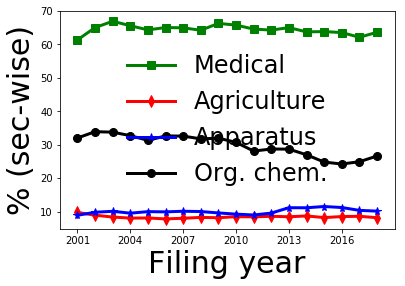

In [130]:
def plot_app_inv_per_filing_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('% (sec-wise)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(IMP_perc_dt["A61"], num)
X, Y2 = no_normalize_year19(IMP_perc_dt["A01"], num)
X, Y3 = no_normalize_year19(IMP_perc_dt["B01"], num)
X, Y4 = no_normalize_year19(IMP_perc_dt["C07"], num)

plot_app_inv_per_filing_year(X,Y1,dt_IMP_names["A61"][0],Y2,dt_IMP_names["A01"][0], Y3, dt_IMP_names["B01"][0], Y4,dt_IMP_names["C07"][0])

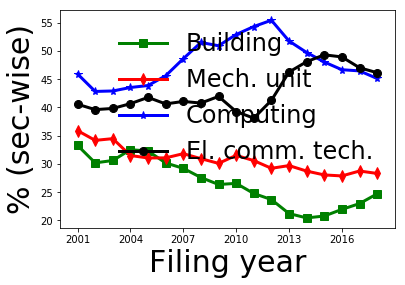

In [132]:
def plot_app_inv_per_filing_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('% (sec-wise)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(IMP_perc_dt["E04"], num)
X, Y2 = no_normalize_year19(IMP_perc_dt["F16"], num)
X, Y3 = no_normalize_year19(IMP_perc_dt["G06"], num)
X, Y4 = no_normalize_year19(IMP_perc_dt["H04"], num)

plot_app_inv_per_filing_year(X,Y1,dt_IMP_names["E04"][0],Y2,dt_IMP_names["F16"][0], Y3, dt_IMP_names["G06"][0], Y4,dt_IMP_names["H04"][0])

In [93]:
def compute_zscore_fields(sub_dicts):
    
    zscores_list_of_dicts = [0]*18
    
    for i in range(0,len(sub_dicts)):
        dt = sub_dicts[i]
        count = 0
        sz = len(dt)
        ls_keys = [0]*sz
        app_per_cat = [0]*sz
        zscores = [0]*sz
        
        for el in dt:
            ls_keys[count] = el
            app_per_cat[count] = len(dt[el])
            count = count+1
        
        zscores = stats.zscore(app_per_cat)    
        
        zscores_list_of_dicts[i] = dict()
        for j in range(0,sz):
            zscores_list_of_dicts[i][ls_keys[j]] = zscores[j]
    
    return zscores_list_of_dicts

zscores_list_of_dicts_yr = compute_zscore_fields(list_SUB_dict_yr)    

In [182]:
ls_IMP_subs = ["A61", "A01", "B01", "C07", "D06","E04","F16","G06","H04"]

In [106]:
#zscores over all fields for the important ones
def compute_Zscores_IMP(dt, ls_IMP_subs):
    zscores_imp = dict()
    for imp in ls_IMP_subs:
        for el in dt:
            for x in el:
                if x == imp:
                    if imp in zscores_imp:
                        zscores_imp[imp].append(el[x])
                        
                    else:
                        zscores_imp[imp] = [el[x]]
    return zscores_imp
zscores_imp_yr = compute_Zscores_IMP(zscores_list_of_dicts_yr, ls_IMP_subs)

In [107]:
for i in zscores_imp_yr:
    print (zscores_imp_yr[i])

[4.271623525276911, 5.047486939586729, 5.612062009158148, 5.259597448518464, 4.94478251531876, 4.974038621777293, 4.693343244783021, 4.300383424360089, 4.5167437811738775, 4.456552011274922, 4.120443363034225, 3.896583956752173, 4.089869042942505, 4.08007041380981, 4.134723363822092, 4.321519049904297, 3.969725612930032, 4.045038516505958]
[0.304280452401677, 0.3000277464034139, 0.30841048466613447, 0.25885708550969094, 0.24141741328487645, 0.2206699704510532, 0.20494774996284762, 0.18473068973247972, 0.182276393634641, 0.20206472653647492, 0.1749227344365978, 0.1731315238576209, 0.19004140740628717, 0.20827606047383537, 0.1709140815930619, 0.21201914286456855, 0.1902681921666159, 0.16132442781639897]
[0.2682945212102999, 0.33813058062515267, 0.3677595861609586, 0.2879987484539781, 0.31672624231639396, 0.2973394308710407, 0.3334477426861838, 0.34530725083436636, 0.3398041948165876, 0.3292840423534407, 0.3260682818363975, 0.27775495652883425, 0.26977558448013345, 0.3234280787687134, 0.3

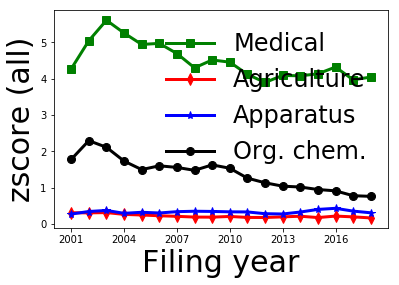

In [133]:
def plot_zscore_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('zscore (all)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(zscores_imp_yr["A61"], num)
X, Y2 = no_normalize_year19(zscores_imp_yr["A01"], num)
X, Y3 = no_normalize_year19(zscores_imp_yr["B01"], num)
X, Y4 = no_normalize_year19(zscores_imp_yr["C07"], num)

plot_zscore_year(X,Y1,dt_IMP_names["A61"][0],Y2,dt_IMP_names["A01"][0], Y3, dt_IMP_names["B01"][0], Y4,dt_IMP_names["C07"][0])

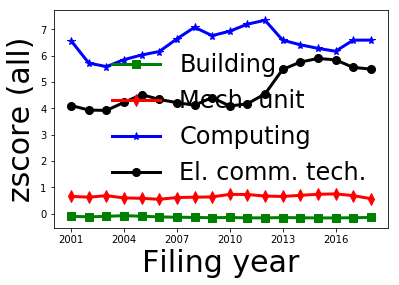

In [135]:
def plot_zscore_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('zscore (all)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(zscores_imp_yr["E04"], num)
X, Y2 = no_normalize_year19(zscores_imp_yr["F16"], num)
X, Y3 = no_normalize_year19(zscores_imp_yr["G06"], num)
X, Y4 = no_normalize_year19(zscores_imp_yr["H04"], num)

plot_zscore_year(X,Y1,dt_IMP_names["E04"][0],Y2,dt_IMP_names["F16"][0], Y3, dt_IMP_names["G06"][0], Y4,dt_IMP_names["H04"][0])

In [108]:
def compute_zscore_sectionwise(sub_dicts, input_sec):
    
    zscores_list_of_dicts = [0]*18
    sec = input_sec
    #sz = 0
   
    
    for i in range(0,len(sub_dicts)):
        dt = sub_dicts[i]
        #find the size:
        sz =0
        for el in dt:
            if sec in el:
                sz = sz+1
        
        count = 0
        
        ls_keys = [0]*sz
        app_per_cat = [0]*sz
        zscores = [0]*sz
        
        for el in dt:
            
            if sec in el:
                ls_keys[count] = el
                app_per_cat[count] = len(dt[el])
                count = count+1
        
        zscores = stats.zscore(app_per_cat)    
        
        zscores_list_of_dicts[i] = dict()
        for j in range(0,sz):
            zscores_list_of_dicts[i][ls_keys[j]] = zscores[j]
    
    return zscores_list_of_dicts
    

In [136]:
zscores_secA_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"A")
zscores_secB_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"B")
zscores_secC_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"C")
zscores_secE_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"E")
zscores_secF_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"F")
zscores_secG_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"G")
zscores_secH_dicts_yr = compute_zscore_sectionwise(list_SUB_dict_yr,"H")

In [145]:
for i in range(0,len(zscores_secH_dicts_yr)):
    print(zscores_secH_dicts_yr[i])
    break
for el in zscores_secA_dicts_yr:
    for x in el:
        #print(len(el))
        if x=="A61":
            print(el[x])

{'H01': 1.1878055503024523, 'H05': -0.8511686165802996, 'H02': -0.8142034739026903, 'H04': 1.260465158878128, 'H03': -0.78289861869759}
3.651759648430724
3.679083638117702
3.6907538385329755
3.686302525890407
3.67616285654828
3.678529003615802
3.679211605976513
3.6761345521805064
3.688891690259793
3.6884310487284724
3.6790708632501143
3.680683838142987
3.6883594442617325
3.68378853888523
3.687039971960121
3.685673377348716
3.675405683167825
3.6844164568468005


In [143]:
#zscores over only fields with A
def create_list_zscore_sec_sub(dt, field, new_d):
    for el in dt:
        for x in el:
            #print(len(el))
            if x==field:
                if x not in new_d:
                    new_d[x]=[el[field]]
                else:
                    new_d[x].append(el[field])
    
new_d = dict()
create_list_zscore_sec_sub(zscores_secA_dicts_yr,"A61", new_d)
create_list_zscore_sec_sub(zscores_secA_dicts_yr,"A01", new_d)
create_list_zscore_sec_sub(zscores_secB_dicts_yr,"B01", new_d)
create_list_zscore_sec_sub(zscores_secC_dicts_yr,"C07", new_d)
create_list_zscore_sec_sub(zscores_secE_dicts_yr,"E04", new_d)
create_list_zscore_sec_sub(zscores_secF_dicts_yr,"F16", new_d)
create_list_zscore_sec_sub(zscores_secG_dicts_yr,"G06", new_d)
create_list_zscore_sec_sub(zscores_secH_dicts_yr,"H04", new_d)

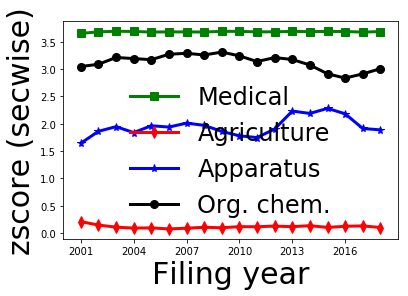

In [144]:
def plot_zscore_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('zscore (secwise)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(new_d["A61"], num)
X, Y2 = no_normalize_year19(new_d["A01"], num)
X, Y3 = no_normalize_year19(new_d["B01"], num)
X, Y4 = no_normalize_year19(new_d["C07"], num)

plot_zscore_year(X,Y1,dt_IMP_names["A61"][0],Y2,dt_IMP_names["A01"][0], Y3, dt_IMP_names["B01"][0], Y4,dt_IMP_names["C07"][0])

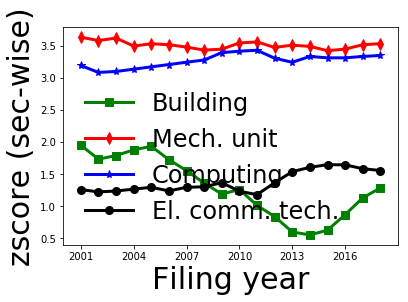

In [146]:
def plot_zscore_year(X,Y1,l1,Y2,l2,Y3,l3,Y4,l4):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=l1)
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=l2)
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label=l3)
    plt.plot(X, Y4, '-ko', linewidth=3, markersize=8, label=l4)
    ax.set_ylabel('zscore (sec-wise)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num=[1]*18
X, Y1 = no_normalize_year19(new_d["E04"], num)
X, Y2 = no_normalize_year19(new_d["F16"], num)
X, Y3 = no_normalize_year19(new_d["G06"], num)
X, Y4 = no_normalize_year19(new_d["H04"], num)

plot_zscore_year(X,Y1,dt_IMP_names["E04"][0],Y2,dt_IMP_names["F16"][0], Y3, dt_IMP_names["G06"][0], Y4,dt_IMP_names["H04"][0])

# Computing status

In [82]:
def compute_peds_disposal_dict(df_app):
    app_date_dict = create_peds_app_date_dict(df_app)
    
    app_id_ls = list(df_app['app_id'].apply(str))
    #sub_matter_ls = list(df_app['invention_subject_matter'].apply(str))
    app_status = list(df_app['app_status'].apply(str))
    app_status_date = list(df_app['status_date'].apply(str))
    app_grant_num = list(df_app['grant_num'].apply(str))
    
    app_status_dict = dict()
    app_status_date_dict = dict()
    stat_no_pat = 0
    stat_pat =0
    print("total: ",len(app_id_ls))
    print("checking for repeatation:", len(set(app_id_ls)))
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        if appid[0]=="0":
            appid = appid[1:]
        kind = app_status[i]
        date = app_status_date[i]
        gr_num = app_grant_num[i]
        
        if appid in app_date_dict:
            
            if date!="nan":

                app_status_date_dict[appid] = date
            
            if gr_num!="" and gr_num!='nan':
                
                app_status_dict[appid] = 'ISS'
                
                if 'Patented' not in kind:
                    stat_no_pat=stat_no_pat+1
                    #print(gr_num)
                else:
                    stat_pat = stat_pat+1
            else:
                if 'Abandoned' in kind:
                     app_status_dict[appid] = 'ABN'

                elif 'ABANDONED' in kind:
                    app_status_dict[appid] = 'ABN'

                else:
                    app_status_dict[appid] = 'PEND'
                    
    print(stat_pat,"  patented but not in status: ",stat_no_pat)
                    
    return app_status_dict, app_status_date_dict


peds_status_dict, peds_status_date_dict= compute_peds_disposal_dict(df_peds_util)

total:  8968837
checking for repeatation: 8968837
3089477   patented but not in status:  787459


In [ ]:
# we have dictionary of dates of application.
# we have the status from the peds data.

In [192]:
#compute the number of accpeted and abandoned ration over years
def compute_app_perc_area_years(list_IMP, peds_status_dict,area):
    main_par = []
    for x in area:
    
        num_abn = [0]*18
        num_iss = [0]*18
        num_pen = 0

        for i in range(0,18):
            dic = list_IMP[i]
            app_ls = dic[x]

            for app in app_ls:
                status = peds_status_dict[app]

                if status == "ISS":

                    num_iss[i]=num_iss[i]+1


                if status == "ABN":


                    num_abn[i]=num_abn[i]+1

                if status == "PEND":
                    num_pen+=1
        per = [(num_iss[i]*100)/(num_iss[i]+num_abn[i]) for i in range(0,18)]
        print("pending: ", num_pen)  
        main_par.append(per)
    
    return main_par

In [284]:
area =["A61","G06","H04","C07","F16"]
main_per = compute_app_perc_area_years(list_IMP_SUB_dict_yr, peds_status_dict,area)

pending:  96160
pending:  131427
pending:  88095
pending:  20829
pending:  17713


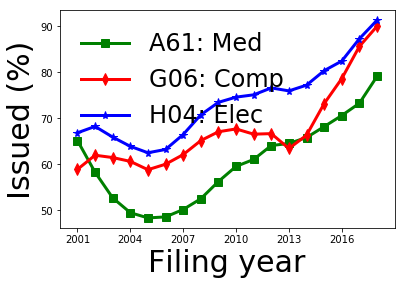

In [287]:
def plot_app_perc_per_filing_year(X,Y1,Y2,Y3):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A61: Med')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='G06: Comp')
    plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label='H04: Elec')
    #plt.plot(X, Y4, '-ys', linewidth=3, markersize=8, label='C07: O.Chem')
    #plt.plot(X, Y5, '-ko', linewidth=3, markersize=8, label='E04: Mech')
    ax.set_ylabel('Issued (%)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num= [1]*18
X, Y1 = no_normalize_year19(main_per[0], num)
X, Y2 = no_normalize_year19(main_per[1], num)
X, Y3 = no_normalize_year19(main_per[2], num)
X, Y4 = no_normalize_year19(main_per[3], num)
X, Y5 = no_normalize_year19(main_per[4], num)
plot_app_perc_per_filing_year(X,Y1,Y2,Y3)

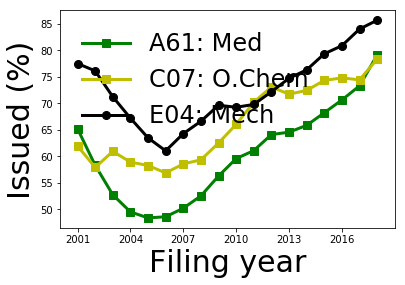

In [288]:
def plot_app_perc_per_filing_year(X,Y1,Y2,Y3):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A61: Med')
    #plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='G06: Comp')
    #plt.plot(X, Y3, '-b*', linewidth=3, markersize=8, label='H04: Elec')
    plt.plot(X, Y4, '-ys', linewidth=3, markersize=8, label='C07: O.Chem')
    plt.plot(X, Y5, '-ko', linewidth=3, markersize=8, label='E04: Mech')
    ax.set_ylabel('Issued (%)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
num= [1]*18
X, Y1 = no_normalize_year19(main_per[0], num)
X, Y2 = no_normalize_year19(main_per[1], num)
X, Y3 = no_normalize_year19(main_per[2], num)
X, Y4 = no_normalize_year19(main_per[3], num)
X, Y5 = no_normalize_year19(main_per[4], num)
plot_app_perc_per_filing_year(X,Y1,Y2,Y3)

## Inventors

In [158]:
df_app_inv =app_par_df[["app_id","app_date","inventors","pub_date"]]

In [1]:
df_app_inv.head()

NameError: name 'df_app_inv' is not defined

In [160]:
df_app_inv.shape

(5905310, 4)

In [163]:
def create_app_inventor_filing_dict(main_app_date_dict,df):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    
    app_id_ls = list(df['app_id'].apply(str))
    inv_ls = list(df['inventors'].apply(str))
    
    #mismatch = rank_check(app_inv_rank_dict)
    app_num_inv_dict = dict()
    
    
    #app_id_ls = list(app_date_dict.keys())
    
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        inv = inv_ls[i]
        if appid in main_app_date_dict: 
        
            if inv!="" and inv!=None:
                
                num_inv = len(inv.split(","))
                app_num_inv_dict[appid] = num_inv
                if num_inv ==0:
                    print("PROBLEM")
        
    return app_num_inv_dict
app_num_inv_dict = create_app_inventor_filing_dict(main_app_date_dict,df_app_inv)

In [ ]:
#list_IMP_SUB_dict_yr 
#ls_IMP_subs,dt_IMP_names , final_SUB_app_dict, list_SUB_dict_yr

In [290]:
def compute_app_num_inv_area_years(list_IMP, inv_dict, peds_status_dict,area):
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for app in app_ls:
            status = peds_status_dict[app]
            
            if status == "ISS":
                num_inv = inv_dict[app]
                iss_inv_year[i] = iss_inv_year[i] + num_inv
                num_iss[i]=num_iss[i]+1
               
                
            if status == "ABN":
            
                num_inv = app_num_inv_dict[app]
                abn_inv_year[i] = abn_inv_year[i] + num_inv
                num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_inv_year, abn_inv_year, num_iss, num_abn

In [358]:
area = "A61"
iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_num_inv_area_years(list_IMP_SUB_dict_yr, app_num_inv_dict, peds_status_dict,area)

pending:  96160


In [359]:
print(iss_inv_year)
print(abn_inv_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[43184, 50618, 61701, 58235, 56198, 62223, 66421, 62232, 68501, 72971, 69706, 74797, 77539, 80321, 79703, 69620, 44211, 16331]
[23344, 34573, 51624, 54041, 53495, 59405, 58406, 51734, 47872, 45309, 40408, 37407, 38557, 38555, 33674, 25919, 14703, 4339]
[14509, 16660, 19534, 18185, 17389, 18990, 19708, 18993, 20263, 21930, 21488, 22998, 24568, 25551, 24719, 21160, 13291, 4757]
344693
[7749, 11916, 17511, 18547, 18561, 20093, 19552, 17161, 15740, 14885, 13693, 12878, 13489, 13255, 11517, 8798, 4842, 1255]
241442


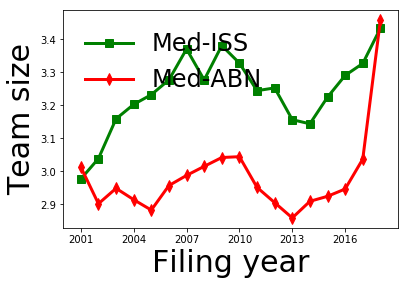

In [293]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Med-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Med-ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [360]:
area = "G06"
iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_num_inv_area_years(list_IMP_SUB_dict_yr, app_num_inv_dict, peds_status_dict,area)

pending:  131427


In [361]:
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

560594
[13585, 12178, 14202, 15955, 17773, 19043, 20498, 19972, 17242, 17926, 19784, 21669, 21788, 20300, 15233, 10085, 4594, 1027]
282854


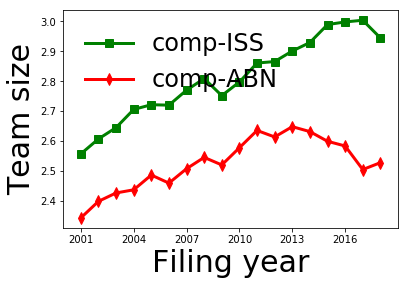

In [295]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='comp-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='comp-ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [362]:
area = "H04"
iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_num_inv_area_years(list_IMP_SUB_dict_yr, app_num_inv_dict, peds_status_dict,area)

pending:  88095


In [363]:
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

481584
[7123, 7239, 9103, 10864, 12425, 12695, 11943, 10187, 9392, 8687, 8950, 9822, 12317, 12933, 11271, 8840, 4431, 1124]
169346


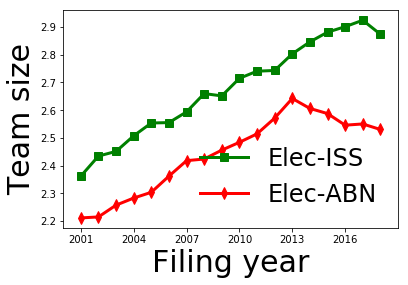

In [297]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Elec-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Elec-ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [364]:
area = "C07"
iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_num_inv_area_years(list_IMP_SUB_dict_yr, app_num_inv_dict, peds_status_dict,area)

pending:  20829


In [365]:
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

144874
[3991, 6012, 6114, 5758, 5392, 6340, 6308, 5919, 5631, 5047, 3914, 3496, 3537, 3596, 3038, 2315, 1648, 575]
78631


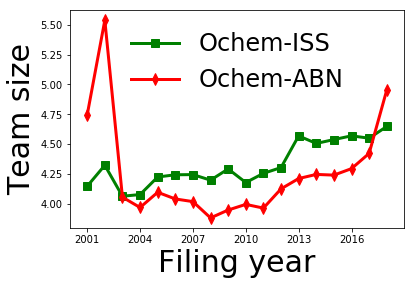

In [299]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Ochem-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Ochem-ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [366]:
area = "F16"
iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_num_inv_area_years(list_IMP_SUB_dict_yr, app_num_inv_dict, peds_status_dict,area)

pending:  17713


In [367]:
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

97375
[1170, 1344, 1995, 2204, 2491, 2755, 2858, 2693, 2371, 2712, 2720, 2540, 2334, 2439, 2152, 1664, 906, 199]
37547


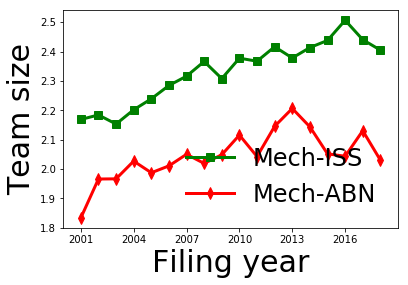

In [301]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Mech-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Mech-ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [82]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

# Lifetime

In [ ]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

In [204]:
def compute_app_lifetime_area_years(list_IMP, peds_status_dict, peds_status_date_dict, area):
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for app in app_ls:
            status = peds_status_dict[app]
            
            if status == "ISS":
                date_app = main_app_date_dict[app]
                if app in peds_status_date_dict:
                    
                    date_gr = peds_status_date_dict[app]
                    time = days_between_hN(date_gr,date_app)

                    iss_inv_year[i] = iss_inv_year[i] + time
                    num_iss[i]=num_iss[i]+1
               
                
            if status == "ABN":
            
                date_app = main_app_date_dict[app]
                if app in peds_status_date_dict:
                    date_gr = peds_status_date_dict[app]
                    time = days_between_hN(date_gr,date_app)
                    abn_inv_year[i] = abn_inv_year[i] + time
                    num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_inv_year, abn_inv_year, num_iss, num_abn

In [302]:
area = "A61"
iss_life_year, abn_life_year, num_iss, num_abn = compute_app_lifetime_area_years(list_IMP_SUB_dict_yr, peds_status_dict, peds_status_date_dict, area)

pending:  96160


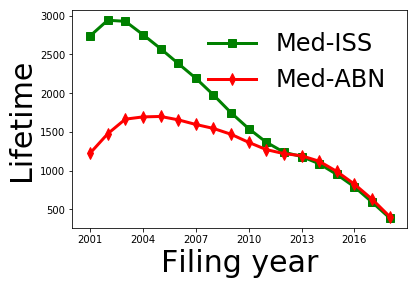

In [303]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Med-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Med-ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_life_year, num_iss)
X, Y2 = normalize_year19(abn_life_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

In [304]:
area = "G06"
iss_life_year, abn_life_year, num_iss, num_abn = compute_app_lifetime_area_years(list_IMP_SUB_dict_yr, peds_status_dict, peds_status_date_dict, area)

pending:  131427


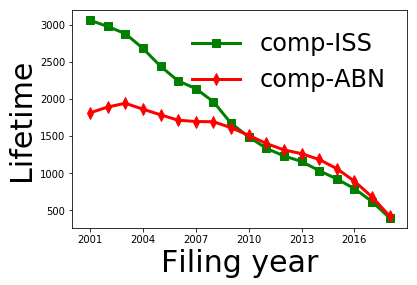

In [305]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='comp-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='comp-ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_life_year, num_iss)
X, Y2 = normalize_year19(abn_life_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

In [306]:
area = "H04"
iss_life_year, abn_life_year, num_iss, num_abn = compute_app_lifetime_area_years(list_IMP_SUB_dict_yr, peds_status_dict, peds_status_date_dict, area)

pending:  88095


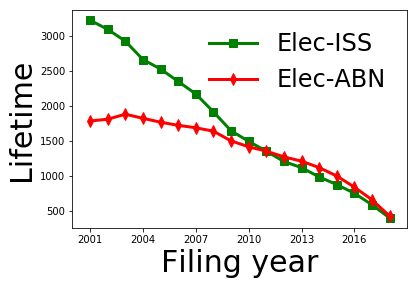

In [307]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Elec-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Elec-ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_life_year, num_iss)
X, Y2 = normalize_year19(abn_life_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

In [308]:
area = "C07"
iss_life_year, abn_life_year, num_iss, num_abn = compute_app_lifetime_area_years(list_IMP_SUB_dict_yr, peds_status_dict, peds_status_date_dict, area)

pending:  20829


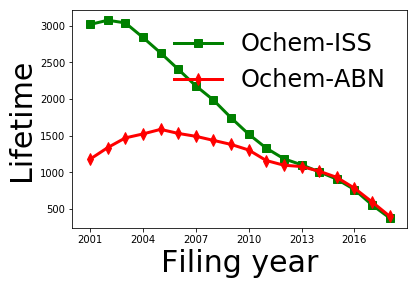

In [309]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Ochem-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Ochem-ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_life_year, num_iss)
X, Y2 = normalize_year19(abn_life_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

In [310]:
area = "F16"
iss_life_year, abn_life_year, num_iss, num_abn = compute_app_lifetime_area_years(list_IMP_SUB_dict_yr, peds_status_dict, peds_status_date_dict, area)

pending:  17713


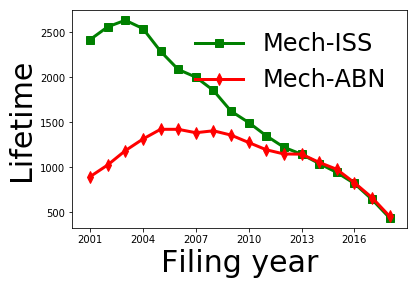

In [311]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Mech-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Mech-ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_life_year, num_iss)
X, Y2 = normalize_year19(abn_life_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

## Claim

In [32]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

In [214]:
def create_combined_claimframe(low,high):   
    frames=[]
    for i in range(low,high):
        numb = i
        app_path = "/kellogg/proj/smz6657/parsed_application_data/"+str(numb)+"/claim_info/"
        temp_df = combine_csv_to_df(app_path)
        frames.append(temp_df)
    app_par_df = pd.concat(frames)
    return app_par_df

In [215]:
claim_par_df = create_combined_claimframe(2001,2020) # collecting from 2001-2019

In [216]:
claim_par_df.head()

,app_id,app_date,app_claim,ind_claim,dep_claim
0,9865525,20010529,\n\n1. Protective helmet (1) of the type const...,6,4
1,9911749,20010723,"\nWhat is claimed is: \n\n1. A face mask, comp...",3,9
2,9867084,20010529,\nWhat is claimed is: \n\n1. A glove to unload...,2,30
3,9933649,20010820,\nI claim: \n\n1. A disposable garment protect...,2,31
4,9841814,20010425,\nWe claim: \n\n1. Therapy apparel for a child...,2,16


In [36]:
claim_par_df.isnull().sum()

app_id       0
app_date     0
app_claim    0
ind_claim    0
dep_claim    0
dtype: int64

In [217]:
# check claim distribution 
def num_claim_per_app(df):
    '''
    Given input dataframe it gives a dictionary with number of claims
    '''
    app_depclaim_dict = dict()
    app_indclaim_dict = dict()
    app_id_ls = list(df['app_id'].apply(str))
    app_ind_claim_ls = list(df['ind_claim'].apply(str))
    app_dep_claim_ls = list(df['dep_claim'].apply(str))
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        clind = float(app_ind_claim_ls[i])
        cldep = float(app_dep_claim_ls[i])
        
        app_indclaim_dict[appid] = clind
        app_depclaim_dict[appid] = cldep
        
        
    return app_indclaim_dict, app_depclaim_dict

In [218]:
app_indclaim_dict, app_depclaim_dict = num_claim_per_app(claim_par_df)

In [219]:
def compute_app_num_claim_area_years(list_IMP, indclaim, peds_status_dict,area):
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for app in app_ls:
            status = peds_status_dict[app]
            
            if status == "ISS":
                num_inv = indclaim[app]
                iss_inv_year[i] = iss_inv_year[i] + num_inv
                num_iss[i]=num_iss[i]+1
               
                
            if status == "ABN":
            
                num_inv = indclaim[app]
                abn_inv_year[i] = abn_inv_year[i] + num_inv
                num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_inv_year, abn_inv_year, num_iss, num_abn

In [312]:
area = "A61"
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_indclaim_dict, peds_status_dict,area)

pending:  96160


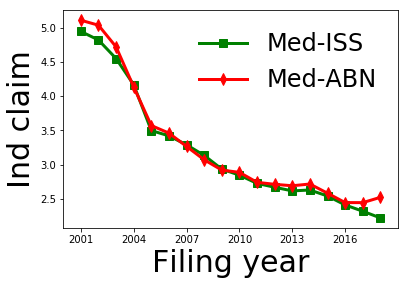

In [313]:
def plot_app_indclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Med-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Med-ABN')
    ax.set_ylabel('Ind claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_filing_year(X,Y1,Y2)

In [314]:
area = "A61"
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_depclaim_dict, peds_status_dict,area)

pending:  96160


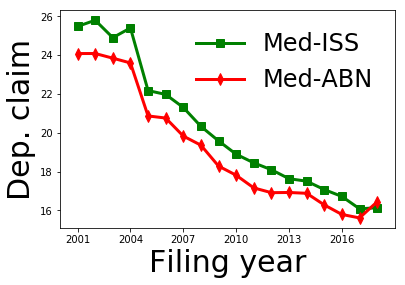

In [315]:
def plot_app_depclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Med-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Med-ABN')
    ax.set_ylabel('Dep. claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_filing_year(X,Y1,Y2)

In [316]:
area = "G06"
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_indclaim_dict, peds_status_dict,area)

pending:  131427


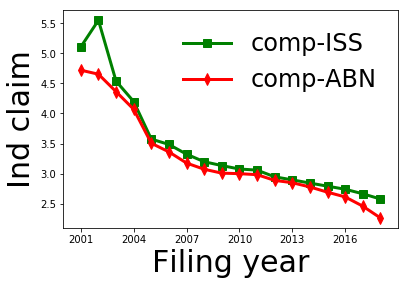

In [317]:
def plot_app_indclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='comp-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='comp-ABN')
    ax.set_ylabel('Ind claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_filing_year(X,Y1,Y2)

In [318]:
area = "G06"
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_depclaim_dict, peds_status_dict,area)

pending:  131427


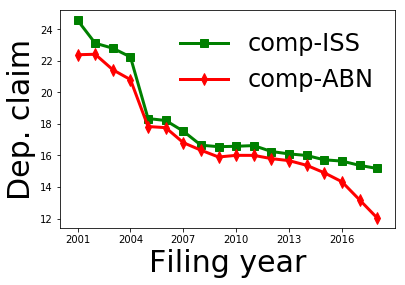

In [319]:
def plot_app_depclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='comp-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='comp-ABN')
    ax.set_ylabel('Dep. claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_filing_year(X,Y1,Y2)

In [320]:
area = "H04"
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_indclaim_dict, peds_status_dict,area)

pending:  88095


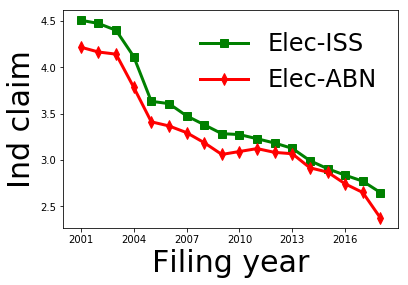

In [321]:
def plot_app_indclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Elec-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Elec-ABN')
    ax.set_ylabel('Ind claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_filing_year(X,Y1,Y2)

In [322]:
area = "H04"
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_depclaim_dict, peds_status_dict,area)

pending:  88095


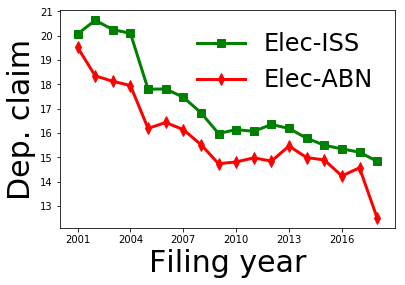

In [323]:
def plot_app_depclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Elec-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Elec-ABN')
    ax.set_ylabel('Dep. claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_filing_year(X,Y1,Y2)

In [324]:
area = "C07"
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_indclaim_dict, peds_status_dict,area)

pending:  20829


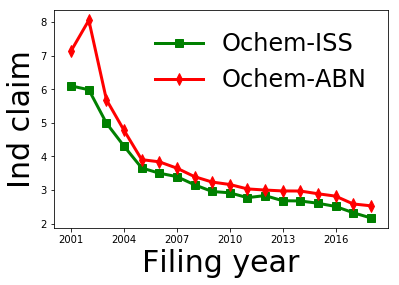

In [325]:
def plot_app_indclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Ochem-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Ochem-ABN')
    ax.set_ylabel('Ind claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_filing_year(X,Y1,Y2)

In [326]:
area = "C07"
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_depclaim_dict, peds_status_dict,area)

pending:  20829


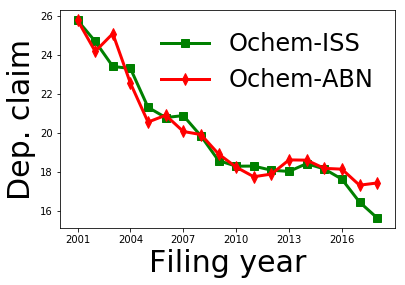

In [327]:
def plot_app_depclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Ochem-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Ochem-ABN')
    ax.set_ylabel('Dep. claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_filing_year(X,Y1,Y2)

In [331]:
area = "F16"
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_indclaim_dict, peds_status_dict,area)

pending:  17713


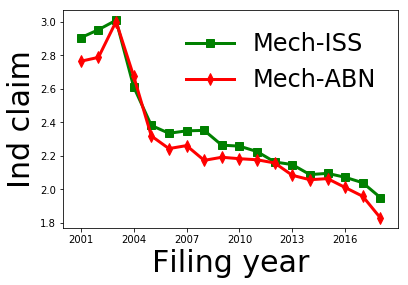

In [332]:
def plot_app_indclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Mech-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Mech-ABN')
    ax.set_ylabel('Ind claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_filing_year(X,Y1,Y2)

In [335]:
area = "F16"
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_num_claim_area_years(list_IMP_SUB_dict_yr,app_depclaim_dict, peds_status_dict,area)

pending:  17713


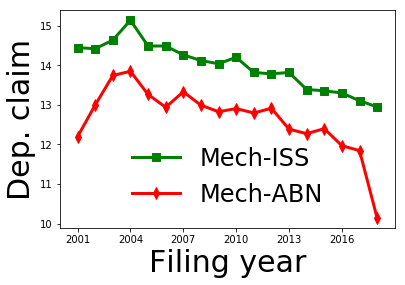

In [336]:
def plot_app_depclaim_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Mech-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='Mech-ABN')
    ax.set_ylabel('Dep. claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_filing_year(X,Y1,Y2)

In [236]:
# check claim distribution 
def length_claim_per_app(df):
    '''
    Given input dataframe it gives a dictionary with number of claims
    '''
    app_text_claim_dict = dict()
    #app_indclaim_dict = dict()
    app_id_ls = list(df['app_id'].apply(str))
    app_text_claim_ls = list(df['app_claim'].apply(str))
    #app_dep_claim_ls = list(df['dep_claim'].apply(str))
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        
        claim_text = app_text_claim_ls[i]
        txt_len = sum(len(x) for x in claim_text.split())
        
        app_text_claim_dict[appid] = txt_len
        
        
        
    return app_text_claim_dict

In [238]:
app_text_claim_dict = length_claim_per_app(claim_par_df)

In [337]:
def compute_app_claimtext_area_years(list_IMP, indclaim, peds_status_dict,area):
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for app in app_ls:
            status = peds_status_dict[app]
            
            if status == "ISS":
                num_inv = indclaim[app]
                iss_inv_year[i] = iss_inv_year[i] + num_inv
                num_iss[i]=num_iss[i]+1
               
                
            if status == "ABN":
            
                num_inv = indclaim[app]
                abn_inv_year[i] = abn_inv_year[i] + num_inv
                num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_inv_year, abn_inv_year, num_iss, num_abn

In [84]:
name_dict ={"A61":"Med","G06":"comp","H04":"Elec", "C07":"Ochem","F16":"Mech"}

In [338]:
def plot_app_textclaim_filing_year(X,Y1,Y2,area):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=area+'-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=area+'-ABN')
    ax.set_ylabel('#Ch', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

pending:  96160


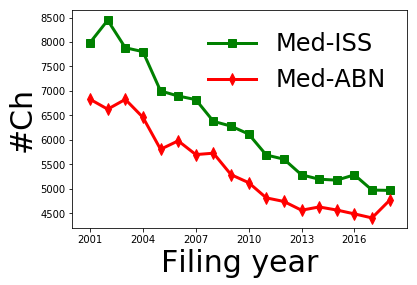

In [340]:
area = "A61"
iss_textclaim_year, abn_textclaim_year, num_iss, num_abn = compute_app_claimtext_area_years(list_IMP_SUB_dict_yr,app_text_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_textclaim_year, num_iss)
X, Y2 = normalize_year19(abn_textclaim_year, num_abn)
plot_app_textclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  131427


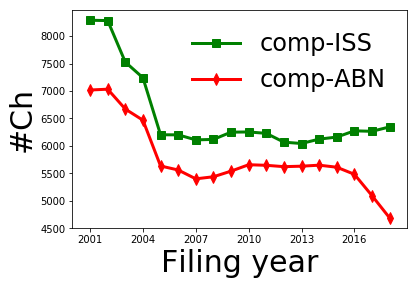

In [341]:
area = "G06"
iss_textclaim_year, abn_textclaim_year, num_iss, num_abn = compute_app_claimtext_area_years(list_IMP_SUB_dict_yr,app_text_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_textclaim_year, num_iss)
X, Y2 = normalize_year19(abn_textclaim_year, num_abn)
plot_app_textclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  88095


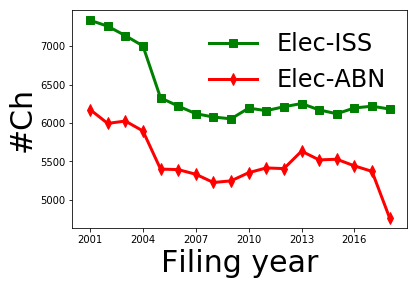

In [342]:
area = "H04"
iss_textclaim_year, abn_textclaim_year, num_iss, num_abn = compute_app_claimtext_area_years(list_IMP_SUB_dict_yr,app_text_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_textclaim_year, num_iss)
X, Y2 = normalize_year19(abn_textclaim_year, num_abn)
plot_app_textclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  20829


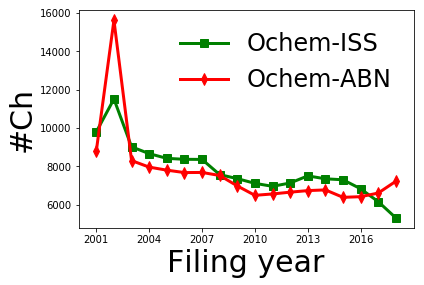

In [343]:
area = "C07"
iss_textclaim_year, abn_textclaim_year, num_iss, num_abn = compute_app_claimtext_area_years(list_IMP_SUB_dict_yr,app_text_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_textclaim_year, num_iss)
X, Y2 = normalize_year19(abn_textclaim_year, num_abn)
plot_app_textclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  17713


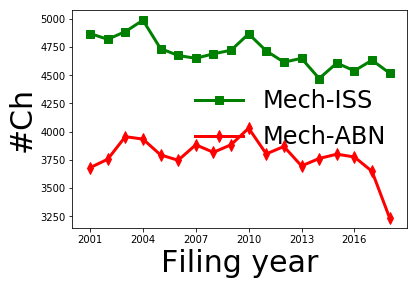

In [344]:
area = "F16"
iss_textclaim_year, abn_textclaim_year, num_iss, num_abn = compute_app_claimtext_area_years(list_IMP_SUB_dict_yr,app_text_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_textclaim_year, num_iss)
X, Y2 = normalize_year19(abn_textclaim_year, num_abn)
plot_app_textclaim_filing_year(X,Y1,Y2,name_dict[area])

In [345]:
def avg_length_claim_per_app(df, app_text_claim_dict):
    '''
    Given input dataframe it gives a dictionary with avg characters of claims
    '''
    app_avgtext_claim_dict = dict()
    app_indclaim_dict, app_depclaim_dict = num_claim_per_app(df)
   
    
    for i in app_text_claim_dict:
        appid = i
        
        claim_text = app_text_claim_dict[i]
        
        if app_indclaim_dict[appid]!=0:
            app_avgtext_claim_dict[appid] = claim_text/(app_indclaim_dict[appid]+app_depclaim_dict[appid])
        
        
        
    return app_avgtext_claim_dict
app_avgtext_claim_dict = avg_length_claim_per_app(claim_par_df,app_text_claim_dict)

In [346]:
def compute_app_avgclaimtext_area_years(list_IMP, indclaim, peds_status_dict,area):
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for app in app_ls:
            status = peds_status_dict[app]
            
            if status == "ISS":
                if app in indclaim:
                    num_inv = indclaim[app]
                    iss_inv_year[i] = iss_inv_year[i] + num_inv
                    num_iss[i]=num_iss[i]+1
               
                
            if status == "ABN":
                if app in indclaim:
                    num_inv = indclaim[app]
                    abn_inv_year[i] = abn_inv_year[i] + num_inv
                    num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_inv_year, abn_inv_year, num_iss, num_abn

In [347]:
def plot_app_avgtextclaim_filing_year(X,Y1,Y2,area):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=area+'-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=area+'-ABN')
    ax.set_ylabel('#Ch per claim', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

pending:  96160


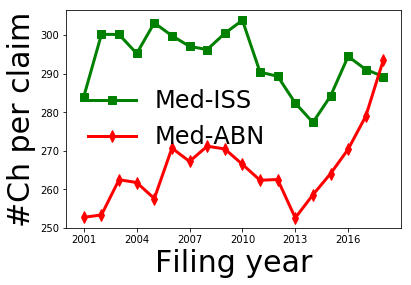

In [348]:
area = "A61"
iss_avgtextclaim_year, abn_avgtextclaim_year, num_iss, num_abn = compute_app_avgclaimtext_area_years(list_IMP_SUB_dict_yr,app_avgtext_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_avgtextclaim_year, num_iss)
X, Y2 = normalize_year19(abn_avgtextclaim_year, num_abn)
plot_app_avgtextclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  131427


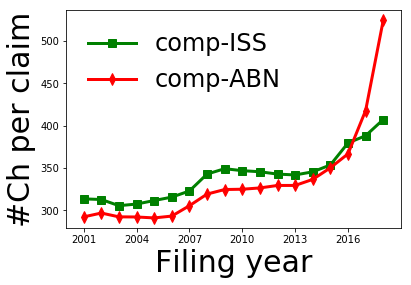

In [349]:
area = "G06"
iss_avgtextclaim_year, abn_avgtextclaim_year, num_iss, num_abn = compute_app_avgclaimtext_area_years(list_IMP_SUB_dict_yr,app_avgtext_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_avgtextclaim_year, num_iss)
X, Y2 = normalize_year19(abn_avgtextclaim_year, num_abn)
plot_app_avgtextclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  88095


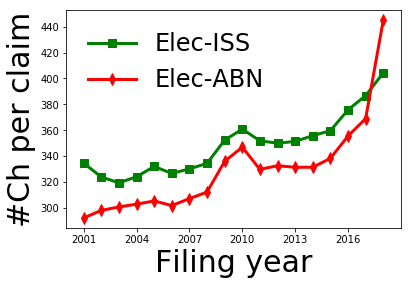

In [350]:
area = "H04"
iss_avgtextclaim_year, abn_avgtextclaim_year, num_iss, num_abn = compute_app_avgclaimtext_area_years(list_IMP_SUB_dict_yr,app_avgtext_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_avgtextclaim_year, num_iss)
X, Y2 = normalize_year19(abn_avgtextclaim_year, num_abn)
plot_app_avgtextclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  20829


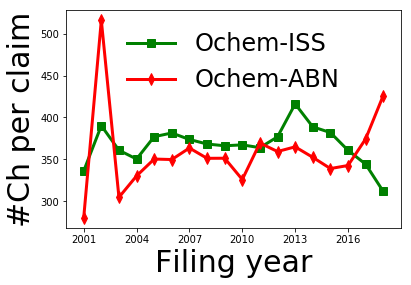

In [351]:
area = "C07"
iss_avgtextclaim_year, abn_avgtextclaim_year, num_iss, num_abn = compute_app_avgclaimtext_area_years(list_IMP_SUB_dict_yr,app_avgtext_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_avgtextclaim_year, num_iss)
X, Y2 = normalize_year19(abn_avgtextclaim_year, num_abn)
plot_app_avgtextclaim_filing_year(X,Y1,Y2,name_dict[area])

pending:  17713


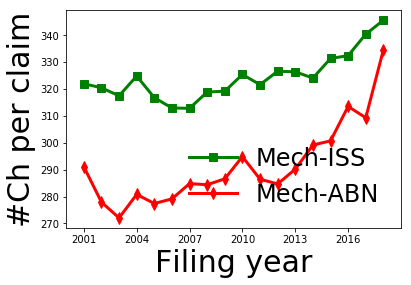

In [352]:
area = "F16"
iss_avgtextclaim_year, abn_avgtextclaim_year, num_iss, num_abn = compute_app_avgclaimtext_area_years(list_IMP_SUB_dict_yr,app_avgtext_claim_dict, peds_status_dict,area)
X, Y1 = normalize_year19(iss_avgtextclaim_year, num_iss)
X, Y2 = normalize_year19(abn_avgtextclaim_year, num_abn)
plot_app_avgtextclaim_filing_year(X,Y1,Y2,name_dict[area])

## Embedding

In [253]:
df_tot_sim = pd.read_csv("/kellogg/proj/smz6657/embed_RESULT/random_claim/random_claim_similarities_n100.csv",sep =';')

In [370]:
df_all_claim_sim = pd.read_csv("/kellogg/proj/smz6657/till_2018_claim_similarities_v100_n200.csv",sep =';')

CParserError: Error tokenizing data. C error: out of memory

In [65]:
mylist = []

for chunk in  pd.read_csv("/kellogg/proj/smz6657/embed_RESULT/ALL_APP_CLAIM/till_2018_APP_claim_similarities_v100_n200.csv", sep=';', chunksize=1000):
    mylist.append(chunk)

df_all_claim_sim = pd.concat(mylist, axis= 0)
del mylist

In [66]:
df_all_claim_sim.shape

(5768424, 2)

In [67]:
df_all_claim_sim.head()

,app_id,similarities
0,A10284701,"[('A10284701', 1.0), ('A10223717', 0.674758344..."
1,A11986154,"[('A11986154', 0.9997885680058971), ('A1143564..."
2,A10365111,"[('A10365111', 1.0), ('A11372513', 0.667901605..."
3,A11963623,"[('A11963623', 0.9998779296875), ('A12058178',..."
4,A11538715,"[('A11538715', 1.0), ('A12037016', 0.637851327..."


In [68]:
df_all_claim_sim.tail()

,app_id,similarities
5768419,A15162257,"[('A15162257', 1.0), ('A12277214', 0.585027605..."
5768420,A14977924,"[('A14977924', 0.9998273665114539), ('A1484544..."
5768421,A15720381,"[('A15720381', 1.0), ('A13672630', 0.556955933..."
5768422,A14807058,"[('A14807058', 1.0), ('A14743293', 0.606152266..."
5768423,A15969921,"[('A15969921', 1.0), ('A15955190', 0.721866369..."


In [254]:
df_tot_sim.shape

(2461998, 2)

In [255]:
df_patent=pd.read_csv('/kellogg/proj/smz6657/grant_data/patent.tsv', sep ='\t')

/software/anaconda3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [256]:
df_pat = df_patent.loc[(df_patent.type == "utility") & (df_patent.country == "US")]

In [257]:
del df_patent

In [258]:
#dropping unnecessary columns
df_pat.drop(["id" ,"type","country","kind","filename","withdrawn"], axis = 1, inplace = True) 

In [259]:
df_pat.head()

,number,date,abstract,title,num_claims
0,10000000,2018-06-19,A frequency modulated (coherent) laser detecti...,Coherent LADAR using intra-pixel quadrature de...,20.0
1,10000001,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,12.0
2,10000002,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,9.0
3,10000003,2018-06-19,The invention relates to a method for producin...,Method for producing a container from a thermo...,18.0
4,10000004,2018-06-19,The present invention relates to provides a do...,"Process of obtaining a double-oriented film, c...",6.0


In [260]:
#id-date dictionary
def create_pat_date_dict(df):
    '''This makes dictionary with only the patents that are granted'''
    
    app_id_ls = list(df['number'].apply(str))
    app_date_ls = list(df['date'].apply(str))
    app_date_dict = dict()
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = app_date_ls[i]
        
       
        if date!= "" or date!=None:
            d = datetime.strptime(date, "%Y-%m-%d").year
            app_date_dict[appid] = date 
              
    return app_date_dict

In [261]:
pat_date_dict = create_pat_date_dict(df_pat)

In [262]:
print(len(pat_date_dict))

6426469


In [263]:
df_tot_sim.head()

,pat_id,similarities
0,A15529463,"[('A15529463', 0.9999999403953552), ('G9495444..."
1,A15092889,"[('A15092889', 1.0), ('G9354510', 0.8187348246..."
2,A15620253,"[('A15620253', 1.0), ('A15051973', 0.897414624..."
3,G5931484,"[('G5931484', 1.0), ('G4349178', 0.75109362602..."
4,G7045648,"[('G7045648', 1.0), ('G6214793', 0.75755804777..."


In [71]:
def create_clean_dict_sim(df):
    
    app_pat_id = list(df['app_id'].apply(str))
    embed= list(df['similarities'].apply(str))
    #print(len)
    clean = dict()
    
    for i in range(0, len(app_pat_id)):
        mod_appid = app_pat_id[i]
        new_str = embed[i][1:-1]
        em =  new_str.split("),")
        count = 0
        list_of_fr =[]
        for x in em:
                if count == 0:
                    count= count+1
                    continue
                y = x.split(",")
                #print(y[0])
                ids = y[0][3:-1]
                #print(ids)
                #print(y[1])
                if count == len(em)-1:
                    dis = float(y[1][:-1])
                else:
                    count= count+1
                    dis = float(y[1])
                #print(dis)
                fr = [ids, dis]
                list_of_fr.append(fr)
    
        clean[mod_appid] = list_of_fr
    return clean
    

In [265]:
sim_dict = create_clean_dict_sim(df_tot_sim)

In [72]:
all_sim_dict = create_clean_dict_sim(df_all_claim_sim)

In [107]:
def print_el(dic, ct):
    count = 0
    for x in dic:
        print(x,"--",dic[x])
        count+=1
        if count > ct:
            break
print_el(all_sim_dict,10)

A10284701 -- [['A10223717', 0.6747583448886871], ['A10131853', 0.6237184405326843], ['A9725974', 0.6236929297447205], ['A9725977', 0.6136428415775299], ['A11248726', 0.6078476011753082], ['A9726065', 0.5995874404907227], ['A11198737', 0.5968640744686127], ['A9918982', 0.581663966178894], ['A10165026', 0.5783974230289459], ['A10245879', 0.5780496895313263], ['A10341879', 0.5757674872875214], ['A10464700', 0.5719439387321472], ['A10077024', 0.5693001449108124], ['A10427716', 0.5660095810890198], ['A10197124', 0.5631801187992096], ['A10463963', 0.563059002161026], ['A11173545', 0.5597425997257233], ['A10733538', 0.5563644170761108], ['A11592490', 0.555435448884964], ['A10417035', 0.5535498261451721], ['A11349558', 0.5523620247840881], ['A11242188', 0.5503261983394623], ['A12488058', 0.5474338829517365], ['A10843235', 0.545192152261734], ['A9761420', 0.5448545813560486], ['A10094558', 0.5437542796134949], ['A10379498', 0.543661892414093], ['A11005782', 0.5420811176300049], ['A10278461', 0.

In [73]:
print(len(all_sim_dict))

5768424


In [267]:
print(len(pat_date_dict))

6426469


In [268]:
print(len( main_app_date_dict))

5695616


In [74]:
def create_APP_embed_dict_clean(sim_dict, main_app_date_dict, NN):
     
    friends_dict = dict()
    #ccccc= 0
    for i in sim_dict:
        #ccccc+=1
        mod_appid = i
        list_friends = sim_dict[i]
        
        appid = mod_appid[1:]
        sim_list =[]
        
        if appid in main_app_date_dict:
            app_date = main_app_date_dict[appid]
    
            fr_count =0
        
            for x in list_friends:
                ids = x[0]
                dis = x[1]
                if "A" in ids:
                    #print(ids)
                    nid = ids[1:]
                    #print(nid)
                    if nid in main_app_date_dict:
                        napp_date = main_app_date_dict[nid]
                        #print("here", napp_date)
                        if compare_app_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)
                    
                if fr_count >= NN:
                    friends_dict[appid] = sim_list
                    break
            #compare the dates
            
        #if ccccc>5:
            #break
        
    return friends_dict

In [109]:
def create_embed_dict_clean(sim_dict, main_app_date_dict, pat_date_dict, NN):
     
    friends_dict = dict()
    #ccccc= 0
    for i in sim_dict:
        #ccccc+=1
        mod_appid = i
        list_friends = sim_dict[i]
        
        appid = mod_appid[1:]
        sim_list =[]
        
        if appid in main_app_date_dict:
            app_date = main_app_date_dict[appid]
    
            fr_count =0
        
            for x in list_friends:
                ids = x[0]
                dis = x[1]
                if "A" in ids:
                    #print(ids)
                    nid = ids[1:]
                    #print(nid)
                    if nid in main_app_date_dict:
                        napp_date = main_app_date_dict[nid]
                        #print("here", napp_date)
                        if app_date> napp_date:
                            fr_count = fr_count+1
                            sim_list.append(dis)
                            
                if "G" in ids:
                    #print(ids)
                    nid = ids[1:]
                    #print(nid)
                    if nid in pat_date_dict:
                        napp_date = pat_date_dict[nid]
                        #print("heregrant", napp_date)
                        if compare_app_pat_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)     
                if fr_count >= NN:
                    friends_dict[appid] = sim_list
                    break
            #compare the dates
            
        #if ccccc>5:
            #break
        
    return friends_dict

In [187]:
#friends_dict = create_embed_dict(df_tot_sim, main_app_date_dict, pat_date_dict, 30)

In [76]:
NN = 30
friends_dict_30 = create_APP_embed_dict_clean(all_sim_dict, main_app_date_dict, NN)

In [106]:
NN = 50
friends_dict_50 = create_APP_embed_dict_clean(all_sim_dict, main_app_date_dict, NN)

In [110]:
NN = 75
friends_dict_75 = create_APP_embed_dict_clean(all_sim_dict, main_app_date_dict, NN)

In [ ]:
NN = 100
friends_dict_100 = create_APP_embed_dict_clean(all_sim_dict, main_app_date_dict, NN)

In [77]:
print(len(friends_dict_30))

5134526


In [272]:
#test
count =0
for i in friends_dict:
    print(i, ":", friends_dict[i], sum(friends_dict[i]))
    count= count+1
    if count == 10:
        break

15529463 : [0.7723225355148315, 0.7601281404495239, 0.7534289956092834, 0.7456469535827637, 0.7426819801330566, 0.7414558529853821, 0.7410765290260315, 0.7385962009429932, 0.73395174741745, 0.7329892516136169, 0.7316779494285583, 0.7313675284385681, 0.7309477925300598, 0.7272037267684937, 0.7264599204063416, 0.7251099348068237, 0.7250932455062866, 0.723628580570221, 0.7213549613952637, 0.720509946346283, 0.7181572318077087, 0.717903733253479, 0.7175100445747375, 0.7127719521522522, 0.7121212482452393, 0.711354672908783, 0.7110413312911987, 0.7108346819877625, 0.7080350518226624, 0.7077142000198364] 21.853075921535492
15092889 : [0.8108808398246765, 0.7854385375976562, 0.7778022885322571, 0.7654565572738647, 0.7631062269210815, 0.7588691711425781, 0.7497870922088623, 0.7465158700942993, 0.741114616394043, 0.7310147285461426, 0.7275965809822083, 0.7182172536849976, 0.7182116508483887, 0.7175405621528625, 0.7158774733543396, 0.7147470712661743, 0.710210919380188, 0.7089407444000244, 0.707

In [78]:
def compute_sim_iss_abn_area_years(list_IMP, friends_dict, peds_status_dict,area):
     
    iss_sim_year = [0]*18
    abn_sim_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    num_pen = 0
    
    for i in range(0,18):
        dic = list_IMP[i]
        app_ls = dic[area]
        
        for appid in app_ls:
            status = peds_status_dict[appid]
            
            if status == "ISS":
                #print(friends_dict[appid])
                if appid in friends_dict:
                    sum_sim = sum(float(j) for j in friends_dict[appid])
                    sim = sum_sim/len(friends_dict[appid])
                    iss_sim_year[i] = iss_sim_year[i] + sim
                    num_iss[i]=num_iss[i]+1
                
                
            if status == "ABN":
                if appid in friends_dict:
                    sum_sim = sum(float(j) for j in friends_dict[appid])
                    sim = sum_sim/len(friends_dict[appid])
                    abn_sim_year[i] = abn_sim_year[i] + sim
                    num_abn[i]=num_abn[i]+1
                
            if status == "PEND":
                num_pen+=1
    print("pending: ", num_pen)          
    return iss_sim_year, abn_sim_year,  num_iss, num_abn

In [98]:
def plot_app_sim_iss_abn_filing_year(X,Y1,Y2,area):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label=area+'-ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label=area+'-ABN')
    ax.set_ylabel('Sim with NN', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2003)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2003, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
area = "A61"
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_area_years(list_IMP_SUB_dict_yr, friends_dict_50, peds_status_dict,area)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))
X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_app_sim_iss_abn_filing_year(X,Y1,Y2,name_dict[area])

pending:  131427
[122, 4460, 16284, 22953, 24753, 27878, 31475, 34454, 34023, 37258, 39321, 43281, 37664, 39872, 41504, 37116, 27388, 9259]
509065
[239, 3573, 10611, 14834, 17258, 18539, 19142, 18467, 16711, 17756, 19723, 21616, 21704, 20245, 15202, 10067, 4593, 1027]
251307


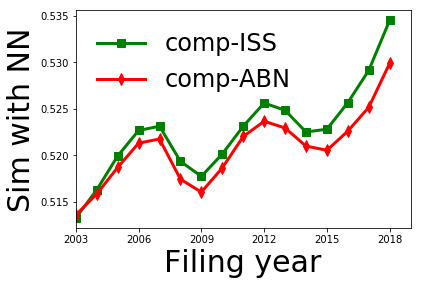

In [100]:
area = "G06"
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_area_years(list_IMP_SUB_dict_yr, friends_dict_50, peds_status_dict,area)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))
X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_app_sim_iss_abn_filing_year(X,Y1,Y2,name_dict[area])

pending:  88095
[107, 3925, 12664, 17849, 20076, 21036, 22115, 22465, 24762, 25169, 26916, 32018, 38607, 43622, 46044, 41488, 30473, 11854]
441190
[53, 1821, 6469, 10004, 12025, 12247, 11223, 9421, 8952, 8562, 8908, 9772, 12222, 12874, 11249, 8823, 4427, 1124]
150176


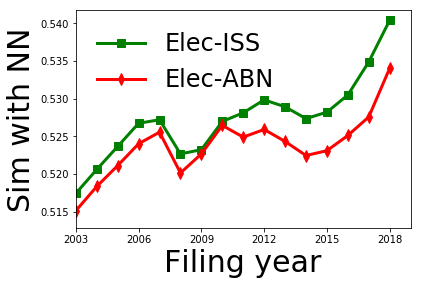

In [101]:
area = "H04"
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_area_years(list_IMP_SUB_dict_yr, friends_dict_30, peds_status_dict,area)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))
X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_app_sim_iss_abn_filing_year(X,Y1,Y2,name_dict[area])

pending:  20829
[489, 4936, 9010, 8069, 7057, 7123, 7379, 7455, 9144, 9755, 9095, 9291, 8463, 9219, 8728, 6824, 4775, 2079]
128891
[935, 4559, 5837, 5642, 4892, 5208, 5142, 5096, 5516, 5019, 3895, 3435, 3374, 3507, 3025, 2309, 1645, 574]
69610


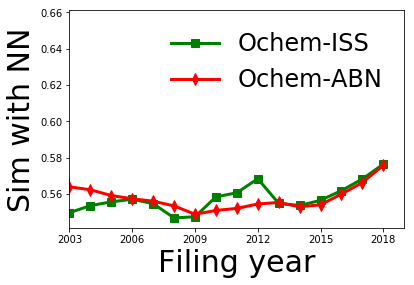

In [102]:
area = "C07"
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_area_years(list_IMP_SUB_dict_yr, friends_dict_30, peds_status_dict,area)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))
X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_app_sim_iss_abn_filing_year(X,Y1,Y2,name_dict[area])

pending:  17713
[12, 1296, 4105, 4377, 4221, 4100, 4868, 5191, 5388, 6089, 6270, 6566, 6811, 7828, 8214, 7028, 4757, 1191]
88312
[1, 316, 1640, 2134, 2426, 2634, 2715, 2613, 2353, 2705, 2716, 2530, 2314, 2438, 2149, 1661, 905, 199]
34449


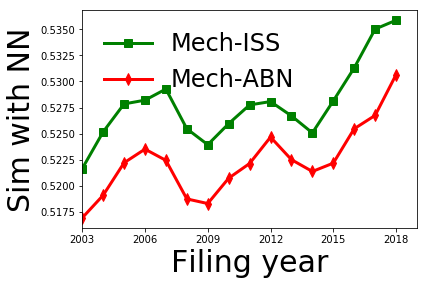

In [103]:
area = "F16"
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_area_years(list_IMP_SUB_dict_yr, friends_dict_30, peds_status_dict,area)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))
X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_app_sim_iss_abn_filing_year(X,Y1,Y2,name_dict[area])